In [4]:
# created on 09.12.2020 by Martti
# idea for model from https://towardsdatascience.com/an-introduction-to-support-vector-regression-svr-a3ebc1672c2 
# inspired by Kaarel XGBoost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold

train_data = pd.read_csv('../Data/Train_Plant1_added_features_standardized.csv')

In [5]:
def create_features(in_data):
    in_data['DATE_TIME'] = pd.to_datetime(in_data['DATE_TIME'])
    in_data["DATE"] = in_data['DATE_TIME'].dt.date
    in_data["HOUR"] = in_data['DATE_TIME'].dt.hour
    in_data["MINUTE"] = in_data['DATE_TIME'].dt.minute
    in_data["DAY_OF_YEAR"] = in_data['DATE_TIME'].dt.dayofyear
    in_data["DAY_OF_WEEK"] = in_data['DATE_TIME'].dt.dayofweek
    in_data["MONTH"] = in_data['DATE_TIME'].dt.month
    in_data["DAY_OF_MONTH"] = in_data['DATE_TIME'].dt.day


train_columns = [
       'HOUR',
       'MINUTE',
       'DAY_OF_YEAR',
       'AMBIENT_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_1',
       'MODULE_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_1',
       'IRRADIATION_PER_INVERTER_DAY_SHIFT_MINUS_1',
       'DC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_1',
       'DC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_2',
       'AC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_2',
       'AMBIENT_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_2',
       'MODULE_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_2',
       'IRRADIATION_PER_INVERTER_DAY_SHIFT_MINUS_2',
       'DC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_3',
       'AC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_3',
       'AMBIENT_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_3',
       'MODULE_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_3',
       'IRRADIATION_PER_INVERTER_DAY_SHIFT_MINUS_3']

create_features(train_data)
split_date = pd.to_datetime('06-01-2020')
pred_train = train_data.loc[train_data.DATE <= split_date].copy()
pred_test = train_data.loc[train_data.DATE > split_date].copy()

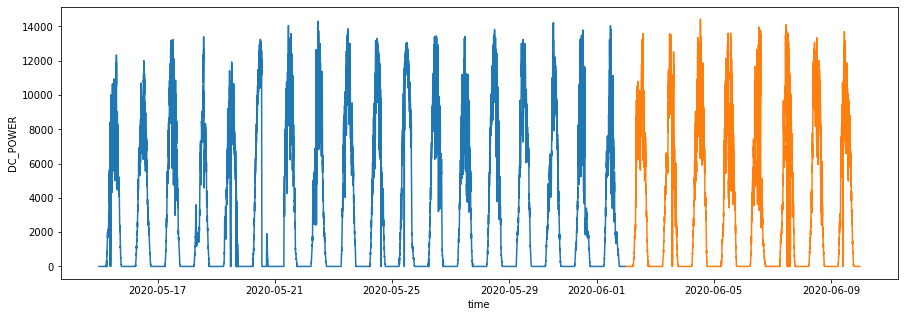

In [6]:
plt.figure(figsize=(15,5))
plt.xlabel('time')
plt.ylabel('DC_POWER')
plt.plot(pred_train["DATE_TIME"],pred_train.DC_POWER)
plt.plot(pred_test["DATE_TIME"],pred_test.DC_POWER)
plt.show()

In [4]:
predict_column = 'DC_POWER'
prediction_models = []
regr = svm.SVR(kernel='linear')
regr.fit(pred_train[train_columns], pred_train[predict_column])
prediction_models.append(regr)





In [5]:
val_predictions = regr.predict(pred_test[train_columns])


In [6]:
print(max(val_predictions))
print(min(val_predictions))
print(np.mean(val_predictions))


1366.609935288664
-32.29850989459641
271.713803234218


In [ ]:
#lihtsamatega katse
train_columns2 = ['HOUR', 'DC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_1']
#
predict_column = 'DC_POWER'
prediction_models = []
regr = svm.SVR(kernel='linear')
regr.fit(pred_train[train_columns2], pred_train[predict_column])
prediction_models.append(regr)

#
val_predictions = regr.predict(pred_test[train_columns2])
#
print(max(val_predictions))
print(min(val_predictions))
print(np.mean(val_predictions))

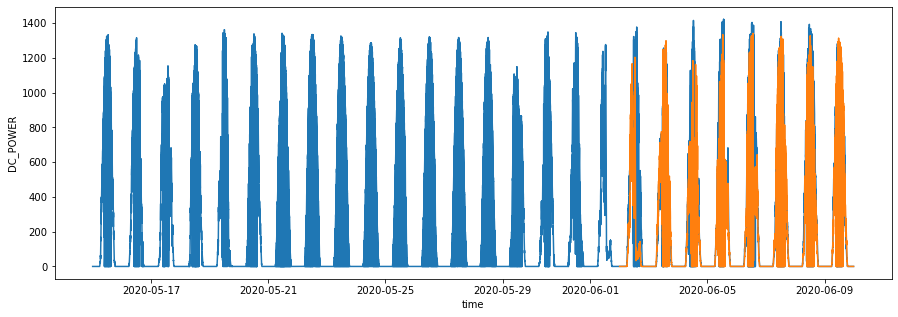

In [14]:
plt.figure(figsize=(15,5))
plt.xlabel('time')
plt.ylabel('DC_POWER')
plt.plot(train_data["DATE_TIME"],train_data.DC_POWER)
plt.plot(pred_test["DATE_TIME"],val_predictions)
plt.show()

In [7]:
#Features selection try all combinations in a set and choose best set
from itertools import combinations
def get_feature_set_rmse(train_columns):
    k = len(train_columns)-1
    print(k)
    new_train_columns = list(combinations(train_columns,k))
    prediction_models = []
    for t in new_train_columns:
        reg = svm.SVR(kernel='linear')
        reg.fit(pred_train[np.asarray(t)], pred_train[predict_column])
        test_predictions = reg.predict(pred_test[np.asarray(t)])
        RMSE = mean_squared_error(pred_test[predict_column], test_predictions)
        prediction_models.append(RMSE)
        print(RMSE, t)
    return (prediction_models, new_train_columns)


In [ ]:
best_models = []
initial_columns = train_columns.copy()
for k in np.arange(len(initial_columns),1,-1):
    (prediction_models, new_train_columns) = get_feature_set_rmse(initial_columns)
    current_loop_best = np.argmin(prediction_models)
    best_models.append((prediction_models[current_loop_best], new_train_columns[current_loop_best]))
    initial_columns = new_train_columns[current_loop_best]
    print('BEST:',prediction_models[current_loop_best],new_train_columns[current_loop_best])

16
71390.49676738786 ('HOUR', 'MINUTE', 'DAY_OF_YEAR', 'AMBIENT_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_1', 'MODULE_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_1', 'IRRADIATION_PER_INVERTER_DAY_SHIFT_MINUS_1', 'DC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_1', 'DC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_2', 'AC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_2', 'AMBIENT_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_2', 'MODULE_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_2', 'IRRADIATION_PER_INVERTER_DAY_SHIFT_MINUS_2', 'DC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_3', 'AC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_3', 'AMBIENT_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_3', 'MODULE_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_3')
72356.36256732304 ('HOUR', 'MINUTE', 'DAY_OF_YEAR', 'AMBIENT_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_1', 'MODULE_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_1', 'IRRADIATION_PER_INVERTER_DAY_SHIFT_MINUS_1', 'DC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_1', 'DC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_2', 'AC_POWER_PER_INVERTER_DAY

72285.00816583022 ('HOUR', 'MINUTE', 'DAY_OF_YEAR', 'MODULE_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_1', 'IRRADIATION_PER_INVERTER_DAY_SHIFT_MINUS_1', 'DC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_1', 'DC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_2', 'AC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_2', 'AMBIENT_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_2', 'MODULE_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_2', 'IRRADIATION_PER_INVERTER_DAY_SHIFT_MINUS_2', 'DC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_3', 'AC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_3', 'AMBIENT_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_3', 'MODULE_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_3', 'IRRADIATION_PER_INVERTER_DAY_SHIFT_MINUS_3')
72245.68464899379 ('HOUR', 'MINUTE', 'AMBIENT_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_1', 'MODULE_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_1', 'IRRADIATION_PER_INVERTER_DAY_SHIFT_MINUS_1', 'DC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_1', 'DC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_2', 'AC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_2', 'AMBIENT_

63891.66672715034 ('HOUR', 'MINUTE', 'DAY_OF_YEAR', 'AMBIENT_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_1', 'MODULE_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_1', 'DC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_1', 'DC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_2', 'AMBIENT_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_2', 'MODULE_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_2', 'IRRADIATION_PER_INVERTER_DAY_SHIFT_MINUS_2', 'DC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_3', 'AC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_3', 'AMBIENT_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_3', 'MODULE_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_3', 'IRRADIATION_PER_INVERTER_DAY_SHIFT_MINUS_3')
63889.825889954445 ('HOUR', 'MINUTE', 'DAY_OF_YEAR', 'AMBIENT_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_1', 'MODULE_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_1', 'DC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_1', 'AC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_2', 'AMBIENT_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_2', 'MODULE_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_2', 'IRRADIATI

In [9]:
from calculate_model_statistics import calculate_RMSE_MSE

predict_column = 'DC_POWER'

#PERFORMANCE VALIDATION ON TEST DATA
train_data = pd.read_csv('../Data/Train_Plant1_added_features_standardized.csv')
test_data = pd.read_csv('../Data/Test_Plant1_added_features_standardized.csv')
#BEST 1 plant model
#model_train_columns = ['HOUR', 'MINUTE', 'IRRADIATION_PER_INVERTER_DAY_SHIFT_MINUS_1', 'DC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_1', 'IRRADIATION_PER_INVERTER_DAY_SHIFT_MINUS_2', 'AMBIENT_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_3', 'IRRADIATION_PER_INVERTER_DAY_SHIFT_MINUS_3']

#BEST 2 plant model
model_train_columns = ['HOUR', 'DC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_1'] #,'IRRADIATION_PER_INVERTER_DAY_SHIFT_MINUS_1'

#DO DATA PREP FOR TRAIN
create_features(train_data)
split_date = pd.to_datetime('06-01-2020')
pred_train = train_data.loc[train_data.DATE <= split_date].copy()
pred_test = train_data.loc[train_data.DATE > split_date].copy()

#TRAIN BEST MODEL AGAIN
reg_final = svm.SVR(kernel='linear')
reg_final.fit(pred_train[model_train_columns], pred_train[predict_column])

#CREATE TEST_DATA FEATURES
create_features(test_data)

#DO TEST DATA PREDICTIONS
test_predictions = reg_final.predict(test_data[model_train_columns])

#INDIVIDUAL PERIODS PREDICTIONS
calculate_RMSE_MSE(test_data, predict_column, test_predictions)

   DAY_OF_YEAR  DC_POWER_SUM  PREDICTED_DC_POWER_SUM
0          162  5.784040e+06            6.624898e+06
1          163  5.045679e+06            5.297057e+06
2          164  5.222354e+06            4.620887e+06
3          165  7.593776e+06            4.782682e+06
4          166  6.350495e+06            6.954362e+06
5          167  6.055536e+06            5.815801e+06
6          168  5.572501e+06            5.545686e+06
7          169  5.317780e+06            5.103337e+06
daily predictions:
 RMSE:1089902.0; MAE:698708.0; R2:-1.00637
individual measurements:
 RMSE:1768.0; MAE:894.0; R2:0.7676


In [7]:
from calculate_model_statistics import calculate_RMSE_MSE


#PERFORMANCE VALIDATION ON TEST DATA
train_data = pd.read_csv('../Data/Train_Plant2_added_features_standardized.csv')
test_data = pd.read_csv('../Data/Test_Plant2_added_features_standardized.csv')
#BEST 1 plant model
#model_train_columns = ['HOUR', 'MINUTE', 'IRRADIATION_PER_INVERTER_DAY_SHIFT_MINUS_1', 'DC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_1', 'IRRADIATION_PER_INVERTER_DAY_SHIFT_MINUS_2', 'AMBIENT_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_3', 'IRRADIATION_PER_INVERTER_DAY_SHIFT_MINUS_3']

#BEST 2 plant model
model_train_columns = ['HOUR', 'DC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_1'] #,'IRRADIATION_PER_INVERTER_DAY_SHIFT_MINUS_1'

#DO DATA PREP FOR TRAIN
create_features(train_data)
split_date = pd.to_datetime('06-01-2020')
pred_train = train_data.loc[train_data.DATE <= split_date].copy()
pred_test = train_data.loc[train_data.DATE > split_date].copy()

#TRAIN BEST MODEL AGAIN
reg_final = svm.SVR(kernel='linear')
reg_final.fit(pred_train[model_train_columns], pred_train[predict_column])

#CREATE TEST_DATA FEATURES
create_features(test_data)

#DO TEST DATA PREDICTIONS
test_predictions = reg_final.predict(test_data[model_train_columns])

#INDIVIDUAL PERIODS PREDICTIONS
calculate_RMSE_MSE(test_data, predict_column, test_predictions)

   DAY_OF_YEAR   DC_POWER_SUM  PREDICTED_DC_POWER_SUM
0          162  393589.770390           621795.158930
1          163  342752.854139           474732.147122
2          164  411233.862857           315132.461962
3          165  455305.790476           369458.519221
4          166  505911.451905           533105.703951
5          167  410998.909524           573147.422579
6          168  480810.068571           462952.638199
7          169  380211.240476           442488.322696
daily predictions:
 RMSE:121105.0; MAE:101451.0; R2:-4.67455
individual measurements:
 RMSE:209.0; MAE:104.0; R2:0.47902
